In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
image_path = "../cropped_images/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

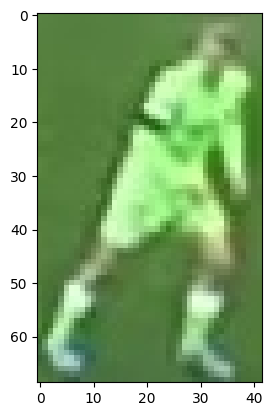

In [5]:
plt.imshow(image)
plt.show()

# Take the top half of the image

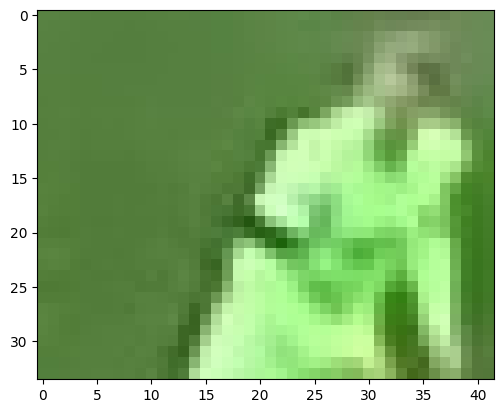

In [6]:
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Create 2 clusters: One for background and one for the t-shirt color

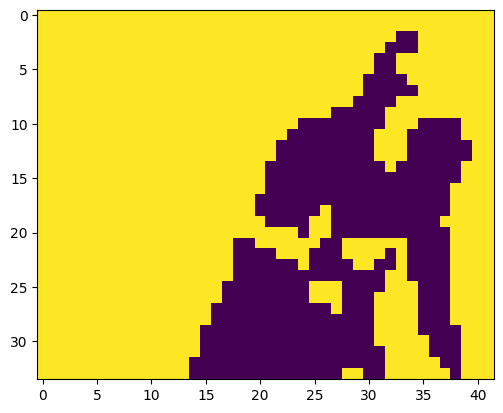

In [11]:
# Reshape the image into 2D array
image_2d = top_half_image.reshape(-1, 3) 

# Perform k-means clustering on the 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get the labels of the clusters
labels = kmeans.labels_

# Reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [ ]:
# A simple binary, 0 or 1, to represent the player cluster
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [17]:
kmeans.cluster_centers_[player_cluster]

array([168.72087379, 232.59708738, 143.01213592])